# Imports

In [1]:
import pandas as pd
import inflection
import streamlit as st
import plotly.express as px
import seaborn as sbn
import folium
from folium.plugins import MarkerCluster
from streamlit_folium import folium_static

# Load

In [2]:
df1 = pd.read_csv('zomato.csv')
df = df1.copy()

# Functions

In [5]:
# Preenchimento do nome dos países
COUNTRIES = {
1: "India",
14: "Australia",
30: "Brazil",
37: "Canada",
94: "Indonesia",
148: "New Zeland",
162: "Philippines",
166: "Qatar",
184: "Singapure",
189: "South Africa",
191: "Sri Lanka",
208: "Turkey",
214: "United Arab Emirates",
215: "England",
216: "United States of America",
}
def country_name(country_id):
    return COUNTRIES[country_id]


In [6]:
# Criação do tipo de categoria de Comida
def create_price_tye(price_range):
    if price_range == 1:
        return "cheap"
    elif price_range == 2:
        return "normal"
    elif price_range == 3:
        return "expensive"
    else:
        return "gourmet"


In [7]:
# Criação nome das Cores
COLORS = {
    "3F7E00": "darkgreen",
    "5BA829": "green",
    "9ACD32": "lightgreen",
    "CDD614": "orange",
    "FFBA00": "red",
    "CBCBC8": "darkred",
    "FF7800": "darkred",
    }
def color_name(color_code):
    return COLORS[color_code]

In [8]:
# Renomear as colunas
def rename_columns(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df

In [19]:
df['Cuisines'].unique().tolist()

['Italian',
 'European',
 'Filipino',
 'American',
 'Korean',
 'Pizza',
 'Taiwanese',
 'Japanese',
 'Coffee',
 'Chinese',
 'Seafood',
 'Singaporean',
 'Vietnamese',
 'Latin American',
 'Healthy Food',
 'Cafe',
 'Fast Food',
 'Brazilian',
 'Argentine',
 'Arabian',
 'Bakery',
 'Tex-Mex',
 'Bar Food',
 'International',
 'French',
 'Steak',
 'German',
 'Sushi',
 'Grill',
 'Peruvian',
 'North Eastern',
 'Ice Cream',
 'Burger',
 'Mexican',
 'Vegetarian',
 'Contemporary',
 'Desserts',
 'Juices',
 'Beverages',
 'Spanish',
 'Thai',
 'Indian',
 'Mineira',
 'BBQ',
 'Mongolian',
 'Portuguese',
 'Greek',
 'Asian',
 'Author',
 'Gourmet Fast Food',
 'Lebanese',
 'Modern Australian',
 'African',
 'Coffee and Tea',
 'Australian',
 'Middle Eastern',
 'Malaysian',
 'Tapas',
 'New American',
 'Pub Food',
 'Southern',
 'Diner',
 'Donuts',
 'Southwestern',
 'Sandwich',
 'Irish',
 'Mediterranean',
 'Cafe Food',
 'Korean BBQ',
 'Fusion',
 'Canadian',
 'Breakfast',
 'Cajun',
 'New Mexican',
 'Belgian',
 'Cuban

# Data Cleaning

In [20]:
# remover as linhas ou colunas com valores nulos
df = df.dropna()

# Chamar a função para renomear a coluna
df = rename_columns(df)

#Criar uma coluna "Price_type
df['price_type'] = df.loc[:, 'price_range'].apply(lambda x: create_price_tye(x))

#Criar coluna 'country'
df['country'] = df.loc[:, 'country_code'].apply(lambda x: country_name(x))

# Criar a coluna 'color_name'
df['color_name'] = df.loc[:, 'rating_color'].apply(lambda x: color_name(x))

#Dividir as strings em substrings - selecionado o primeiro indice
df['cuisines'] = df.loc[:, 'cuisines'].apply(lambda x: x.split(',')[0])

# remover linhas duplicadas
df = df.drop_duplicates()


In [21]:
# salvar o novo dados tratados
df.to_csv('data.csv', index=False)

In [2]:
# carregar os dados limpos
df = pd.read_csv('data.csv')

# Descrição das colunas

| columns | Desription |
|---------|------------|
Restaurant ID | ID do restaurante
Restaurant Name | Nome do Restaurante
Country Code | Código do País
City | Nome da Cidade onde o restaurante está
Address | Endereço do restaurante
Locality | Localização e pontos de referência do restaurante
Locality Verbose | Localização e pontos de referência do restaurante (Mais informações)
Longitude | Ponto geográfico de Longitude do Restaurante
Latitude | Ponto geográfico de Latitude do Restaurante
Cuisines | Tipos de Culinária servidos no restaurante
Average Cost for two | Preço Médio de um prato para duas pessoas no restaurante
Currency | Moeda do país
Has Table booking | Se o restaurante possui serviços de reserva; 1 - Sim; 0 - Não
Has Online delivery | Se o restaurante possui serviços de pedido on-line; 1 - Sim; 0 - Não
Is delivering now | Se o restaurante faz entregas; 1 - Sim; 0 - Não
Switch to order menu | -
Price range | Variação de preços do restaurante; 1 a 4 - Quanto maior o valor, mais caro serão os pratos
Aggregate rating | Nota média do restaurante
Rating color | Código Hexadecimal da cor do restaurante com base em sua nota média
Rating text | Categoria em que o restaurante está com base em sua nota média
Votes | Quantidade de avaliações que o restaurante já recebeu
Price Type | Tipo de preço
Country | nome do país onde o restaurante está
Color Name | Nome da cor do restaurante com base em sua nota média

# Respondendo as Perguntas

# Geral

## 1. Quantos restaurantes únicos estão registrados?

In [3]:
df['restaurant_id'].nunique()

6929

## 2. Quantos países únicos estão registrados?

In [4]:
df['country'].nunique()

15

## 3. Quantas cidades únicas estão registradas?

In [27]:
df['city'].nunique()

125

## 4. Qual o total de avaliações feitas?

In [5]:
df['votes'].sum()

4194533

## 5. Qual o total de tipos de culinária registrados?


In [29]:
df['cuisines'].nunique()

165

# País

## 1. Qual o nome do país que possui mais cidades registradas?

In [9]:
df.loc[:, ['city', 'country']].groupby('country').nunique().sort_values('city', ascending=False).reset_index().iloc[0,0]

'India'

## 2. Qual o nome do país que possui mais restaurantes registrados?

In [11]:
df.loc[:, ['country', 'restaurant_id']].groupby('country').nunique().sort_values('restaurant_id', ascending=False).reset_index()

,country,restaurant_id
0,India,3111
1,United States of America,1374
2,England,400
3,South Africa,346
4,United Arab Emirates,300
5,Brazil,240
6,New Zeland,239
7,Australia,180
8,Canada,180
9,Turkey,159


## 3. Qual o nome do país que possui mais restaurantes com o nível de preço igual a 4 registrados?

In [15]:
(df.loc[df['price_range'] == 4, ['country', 'restaurant_id']].groupby('country')
                                                             .nunique()
                                                             .sort_values('restaurant_id', ascending=False).reset_index())

,country,restaurant_id
0,United States of America,415
1,South Africa,221
2,India,195
3,Brazil,148
4,United Arab Emirates,102
5,England,79
6,New Zeland,79
7,Turkey,59
8,Singapure,58
9,Canada,54


## 4. Qual o nome do país que possui a maior quantidade de tipos de culinária distintos?

In [17]:
df.loc[:, ['country', 'cuisines']].groupby('country').nunique().sort_values('cuisines', ascending=False).reset_index()

,country,cuisines
0,India,77
1,United States of America,74
2,England,52
3,United Arab Emirates,46
4,Australia,43
5,Brazil,43
6,Canada,42
7,South Africa,42
8,New Zeland,37
9,Qatar,31


## 5. Qual o nome do país que possui a maior quantidade de avaliações feitas?


In [19]:
df.loc[:, ['country', 'votes']].groupby('country').sum().sort_values('votes', ascending=False).reset_index()

,country,votes
0,India,2800164
1,United States of America,522348
2,United Arab Emirates,177564
3,Australia,130357
4,Canada,105018
5,Turkey,100193
6,Indonesia,89026
7,South Africa,81939
8,New Zeland,52532
9,Philippines,48398


## 6. Qual o nome do país que possui a maior quantidade de restaurantes que fazem entrega?

In [23]:
(df.loc[df['is_delivering_now'] == 1, ['country','restaurant_id' ]].groupby('country')
                                                                   .nunique().sort_values('restaurant_id',ascending=False)
                                                                   .reset_index())

,country,restaurant_id
0,India,1150
1,United Arab Emirates,52
2,Philippines,7
3,Qatar,3


## 7. Qual o nome do país que possui a maior quantidade de restaurantes que aceitam reservas?

In [26]:
(df.loc[df['has_table_booking'] == 1, ['country', 'restaurant_id']].groupby('country')
                                                                   .nunique().sort_values('restaurant_id', ascending=False)
                                                                   .reset_index())

,country,restaurant_id
0,India,256
1,England,55
2,Australia,29
3,Philippines,22
4,New Zeland,19
5,Indonesia,14
6,United Arab Emirates,10
7,Qatar,4
8,Turkey,4
9,South Africa,3


## 8. Qual o nome do país que possui, na média, a maior quantidade de avaliações registrada?

In [30]:
df.loc[:, ['country', 'votes']].groupby('country').mean().sort_values('votes', ascending=False).reset_index()

,country,votes
0,Indonesia,1112.825000
1,India,900.084860
2,Australia,724.205556
3,Turkey,630.144654
4,Philippines,604.975000
5,United Arab Emirates,591.880000
6,Canada,583.433333
7,United States of America,380.165939
8,Qatar,376.325000
9,South Africa,236.817919


## 9. Qual o nome do país que possui, na média, a maior nota média registrada?

In [33]:
df.loc[:, ['country', 'aggregate_rating']].groupby('country').mean().sort_values('aggregate_rating', ascending=False).reset_index()

,country,aggregate_rating
0,Indonesia,4.601250
1,Philippines,4.463750
2,Singapure,4.435000
3,United States of America,4.402693
4,Australia,4.372778
5,Canada,4.321667
6,Turkey,4.310063
7,Qatar,4.240000
8,New Zeland,4.164435
9,South Africa,4.061561


## 10. Qual o nome do país que possui, na média, a menor nota média registrada?


In [32]:
df.loc[:, ['country', 'aggregate_rating']].groupby('country').mean().sort_values('aggregate_rating', ascending=True).reset_index()

,country,aggregate_rating
0,Brazil,3.321667
1,United Arab Emirates,4.023667
2,India,4.037126
3,England,4.041750
4,Sri Lanka,4.057500
5,South Africa,4.061561
6,New Zeland,4.164435
7,Qatar,4.240000
8,Turkey,4.310063
9,Canada,4.321667


## 11. Qual a média de preço de um prato para dois por país?

In [35]:
df.loc[:, ['country', 'average_cost_for_two']].groupby('country').mean().sort_values('average_cost_for_two', ascending=False).reset_index()

,country,average_cost_for_two
0,Indonesia,303000.000000
1,Australia,138959.783333
2,Sri Lanka,2579.375000
3,Philippines,1227.825000
4,India,704.400514
5,South Africa,339.228324
6,Qatar,174.000000
7,United Arab Emirates,153.716667
8,Singapure,141.437500
9,Brazil,138.812500


# Cidade

## 1. Qual o nome da cidade que possui mais restaurantes registrados?

In [41]:
df.loc[:, ['city', 'restaurant_id']].groupby(['city']).nunique().sort_values('restaurant_id', ascending=False).reset_index().iloc[0,0]

'Abu Dhabi'

## 2. Qual o nome da cidade que possui mais restaurantes com nota média acima de 4?

In [46]:
(df.loc[df['aggregate_rating'] > 4, ['city', 'restaurant_id']].groupby('city')
                                                              .nunique().sort_values('restaurant_id', ascending=False)
                                                              .reset_index().iloc[0,0])

'Bangalore'

## 3. Qual o nome da cidade que possui mais restaurantes com nota média abaixo de 2.5?

In [49]:
(df.loc[df['aggregate_rating'] < 2.5, ['country', 'city', 'restaurant_id']].groupby(['country','city'])
                                                              .nunique().sort_values('restaurant_id', ascending=False)
                                                              .reset_index().iloc[0,1])

'Gangtok'

## 4. Qual o nome da cidade que possui o maior valor médio de um prato para dois?

In [57]:
(df.loc[:, ['country','city','average_cost_for_two']].groupby(['country','city'])
                                           .max().sort_values('average_cost_for_two', ascending=False)
                                           .reset_index().iloc[0,1])

'Adelaide'

## 5. Qual o nome da cidade que possui a maior quantidade de tipos de culinária distintas?

In [75]:
(df.loc[:, ['country','city', 'cuisines']].groupby(['country','city'])
                                          .nunique().sort_values('cuisines', ascending=False)
                                          .reset_index().iloc[0,1])

'Birmingham'

## 6. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem reservas?

In [73]:
(df.loc[df['has_table_booking'] == 1, ['country', 'city', 'restaurant_id']].groupby(['country', 'city'])
                                                                           .count()
                                                                           .sort_values('restaurant_id', ascending=False)
                                                                           .reset_index().iloc[0,1])

'Bangalore'

## 7. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem entregas?

In [71]:
(df.loc[df['is_delivering_now'] == 1, ['country', 'city', 'restaurant_id']].groupby(['country', 'city'])
                                                                           .count()
                                                                           .sort_values('restaurant_id', ascending=False)
                                                                           .reset_index().iloc[0,1])

'Amritsar'

## 8. Qual o nome da cidade que possui a maior quantidade de restaurantes que aceitam pedidos online?

In [72]:
(df.loc[df['has_online_delivery'] == 1, ['country', 'city', 'restaurant_id']].groupby(['country', 'city'])
                                                                           .count()
                                                                           .sort_values('restaurant_id', ascending=False)
                                                                           .reset_index().iloc[0,1])

'Bhopal'

# Restaurantes

## 1. Qual o nome do restaurante que possui a maior quantidade de avaliações?

In [8]:
(df.loc[:, ['restaurant_id','restaurant_name','country','city', 'votes']]
   .sort_values(['votes', 'restaurant_id'], ascending=[False, True]).reset_index())

,index,restaurant_id,restaurant_name,country,city,votes
0,3678,90896,Bawarchi,India,Hyderabad,41333
1,2901,58882,Byg Brewski Brewing Company,India,Bangalore,17394
2,2853,51705,Toit,India,Bangalore,15270
3,2867,51040,Truffles,India,Bangalore,14984
4,4697,308322,Hauz Khas Social,India,New Delhi,13627
...,...,...,...,...,...,...
6924,6221,18756337,Alston Bar & Beef,England,Manchester,0
6925,6222,18756343,The Pasta Factory,England,Manchester,0
6926,6218,18756659,Veeno,England,Manchester,0
6927,4776,18971344,Kabab Corner,India,Ooty,0


## 2. Qual o nome do restaurante com a maior nota média?

In [11]:
(df.loc[:, ['restaurant_id','restaurant_name','country','city', 'votes','aggregate_rating']]
   .sort_values(['aggregate_rating', 'restaurant_id'], ascending=[False, True]))

,restaurant_id,restaurant_name,country,city,votes,aggregate_rating
3533,7528,Indian Grill Room,India,Gurgaon,3062,4.9
3526,8913,Pirates of Grill,India,Gurgaon,5760,4.9
4995,10021,Darshan,India,Pune,3106,4.9
4067,20842,Barbeque Nation,India,Kolkata,8271,4.9
2883,56618,AB's - Absolute Barbecues,India,Bangalore,12443,4.9
...,...,...,...,...,...,...
4783,18994548,V. Krishnan Bakery,India,Ooty,3,0.0
4730,18997511,Jain Restaurant,India,Ooty,2,0.0
5166,19034826,Republic of Chicken,India,Shimla,1,0.0
5174,19035941,City Point,India,Shimla,1,0.0


## 3. Qual o nome do restaurante que possui o maior valor de uma prato para duas pessoas?

In [12]:
(df.loc[:, ['restaurant_id','restaurant_name','country','city', 'votes','average_cost_for_two','aggregate_rating']]
   .sort_values(['average_cost_for_two', 'restaurant_id'], ascending=[False, True]))

,restaurant_id,restaurant_name,country,city,votes,average_cost_for_two,aggregate_rating
356,16608070,d'Arry's Verandah Restaurant,Australia,Adelaide,203,25000017,4.7
5567,7403667,The Café - Hotel Mulia,Indonesia,Jakarta,1753,1200000,4.8
5603,7423164,GIA Restaurant & Bar,Indonesia,Jakarta,665,700000,4.6
5562,7402935,SKYE,Indonesia,Jakarta,2514,600000,4.5
5573,7425027,Shabu-Shabu Shaburi,Indonesia,Jakarta,521,600000,4.4
...,...,...,...,...,...,...,...
6685,18767581,Saint,South Africa,Sandton,173,0,3.9
3547,18962231,Olive Garden,India,Guwahati,40,0,3.7
5166,19034826,Republic of Chicken,India,Shimla,1,0,0.0
5174,19035941,City Point,India,Shimla,1,0,0.0


## 4. Qual o nome do restaurante de tipo de culinária brasileira que possui a menor média de avaliação?

In [14]:
(df.loc[df['cuisines'] == 'Brazilian', ['restaurant_id','restaurant_name','country','city', 'votes','average_cost_for_two','aggregate_rating']]
   .sort_values(['aggregate_rating', 'restaurant_id'], ascending=[True, True]))

,restaurant_id,restaurant_name,country,city,votes,average_cost_for_two,aggregate_rating
117,6600100,Loca Como tu Madre,Brazil,Brasília,3,60,0.0
96,6600119,Café Savana,Brazil,Brasília,1,90,0.0
116,6600124,Inácia Poulet Rôti,Brazil,Brasília,2,140,0.0
139,6600456,Galeteria Beira Lago,Brazil,Brasília,3,55,0.0
120,6601251,Severina,Brazil,Brasília,1,140,0.0
...,...,...,...,...,...,...,...
1020,16881352,Fogo de Chao Brazilian Steakhouse,United States of America,Houston,842,70,4.8
191,7300955,Braseiro da Gávea,Brazil,Rio de Janeiro,47,100,4.9
230,7302898,Aprazível,Brazil,Rio de Janeiro,63,300,4.9
2212,18403563,Texas de Brazil,United Arab Emirates,Abu Dhabi,541,350,4.9


## 5. Qual o nome do restaurante de tipo de culinária brasileira, e que é do Brasil, que possui a maior média de avaliação?

In [18]:
line = (df['cuisines'] == 'Brazilian') & (df['country'] == 'Brazil')
(df.loc[line, ['restaurant_id','restaurant_name','country','city', 'votes','average_cost_for_two','aggregate_rating']]
   .sort_values(['aggregate_rating', 'restaurant_id'], ascending=[False, True]))

,restaurant_id,restaurant_name,country,city,votes,average_cost_for_two,aggregate_rating
191,7300955,Braseiro da Gávea,Brazil,Rio de Janeiro,47,100,4.9
230,7302898,Aprazível,Brazil,Rio de Janeiro,63,300,4.9
317,6709740,Mocotó,Brazil,São Paulo,30,120,4.8
197,7300515,Garota de Ipanema,Brazil,Rio de Janeiro,58,120,4.8
165,7301525,Fogo de Chão,Brazil,Rio de Janeiro,26,280,4.8
199,7300483,Zazá Bistrô Tropical,Brazil,Rio de Janeiro,26,170,4.7
235,7302859,Aconchego Carioca,Brazil,Rio de Janeiro,19,85,4.7
318,6703176,Veloso,Brazil,São Paulo,64,70,4.6
195,7300521,Balada Mix,Brazil,Rio de Janeiro,18,90,4.6
316,6709580,Esquina Mocotó,Brazil,São Paulo,21,100,4.5


## 6. Os restaurantes que aceitam pedido online são também, na média, os restaurantes que mais possuem avaliações registradas?

In [28]:
df.loc[:, ['has_online_delivery', 'votes']].groupby('has_online_delivery').mean().sort_values('has_online_delivery', ascending=False).reset_index()

,has_online_delivery,votes
0,1,838.821664
1,0,479.421018


## 7. Os restaurantes que fazem reservas são também, na média, os restaurantes que possuem o maior valor médio de um prato para duas pessoas?

In [32]:
(df.loc[:, ['has_table_booking','average_cost_for_two']].groupby ('has_table_booking')
                                                        .mean()
                                                        .sort_values('average_cost_for_two', ascending=False)
                                                        .reset_index())

,has_table_booking,average_cost_for_two
0,1,69998.423810
1,0,3488.596866


## 8. Os restaurantes do tipo de culinária japonesa dos Estados Unidos da América possuem um valor médio de prato para duas pessoas maior que as churrascarias americanas (BBQ)?

In [45]:
lines = ((df['cuisines'] == 'Japanese') | (df['cuisines'] == 'BBQ')) & (df['country'] == 'United States of America')

df.loc[lines, ['average_cost_for_two', 'cuisines']].groupby('cuisines').mean().sort_values('average_cost_for_two', ascending=False).reset_index()

,cuisines,average_cost_for_two
0,Japanese,56.406250
1,BBQ,39.642857


# Tipos de Culinária

## 1. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a maior média de avaliação?

In [59]:
cols = ['restaurant_id', 'restaurant_name', 'country', 'city', 'cuisines', 'aggregate_rating']
lines = df['cuisines'] == 'Italian'

df.loc[lines, cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending=[False, True]).reset_index()

,index,restaurant_id,restaurant_name,country,city,cuisines,aggregate_rating
0,4995,10021,Darshan,India,Pune,Italian,4.9
1,6651,6501298,Cafe Del Sol Classico,South Africa,Randburg,Italian,4.9
2,5810,7100171,Ombra,New Zeland,Wellington City,Italian,4.9
3,6054,7700796,Celino's,England,Glasgow,Italian,4.9
4,337,16587684,Andre's Cucina & Polenta Bar,Australia,Adelaide,Italian,4.9
...,...,...,...,...,...,...,...
385,6195,6800666,Le Delicatezze Di Bruno,England,Manchester,Italian,0.0
386,220,7304910,Bene - Sheraton Rio Hotel,Brazil,Rio de Janeiro,Italian,0.0
387,170,18334183,La Bocca Bar e Trattoria,Brazil,Rio de Janeiro,Italian,0.0
388,6222,18756343,The Pasta Factory,England,Manchester,Italian,0.0


## 2. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a menor média de avaliação?

In [67]:
cols = ['restaurant_id', 'restaurant_name', 'country', 'city', 'cuisines', 'aggregate_rating']
lines = df['cuisines'] == 'Italian'

df.loc[lines, cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending=[True, True]).reset_index()

,index,restaurant_id,restaurant_name,country,city,cuisines,aggregate_rating
0,138,6600542,Avenida Paulista,Brazil,Brasília,Italian,0.0
1,278,6714499,Ristorantino,Brazil,São Paulo,Italian,0.0
2,297,6715707,Più,Brazil,São Paulo,Italian,0.0
3,6195,6800666,Le Delicatezze Di Bruno,England,Manchester,Italian,0.0
4,220,7304910,Bene - Sheraton Rio Hotel,Brazil,Rio de Janeiro,Italian,0.0
...,...,...,...,...,...,...,...
385,1755,17156258,Cerroni's Purple Garlic,United States of America,San Antonio,Italian,4.9
386,1769,17156955,Guillermo's,United States of America,San Antonio,Italian,4.9
387,1348,17242351,Central Grocery,United States of America,New Orleans,Italian,4.9
388,3796,18209498,Zolocrust - Hotel Clarks Amer,India,Jaipur,Italian,4.9


## 3. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a maior média de avaliação?

In [69]:
cols = ['restaurant_id', 'restaurant_name', 'country', 'city', 'cuisines', 'aggregate_rating']
lines = df['cuisines'] == 'American'

df.loc[lines, cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending=[False, True]).reset_index()

,index,restaurant_id,restaurant_name,country,city,cuisines,aggregate_rating
0,6123,6102616,Burger & Lobster,England,London,American,4.9
1,6228,6801374,Solita,England,Manchester,American,4.9
2,694,16631515,OEB Breakfast Co.,Canada,Calgary,American,4.9
3,790,16737455,Portillo's Hot Dogs,United States of America,Chicago,American,4.9
4,1410,16776778,S'MAC,United States of America,New York City,American,4.9
...,...,...,...,...,...,...,...
515,5850,7100971,Thunderbird Cafe,New Zeland,Wellington City,American,3.2
516,6677,6502573,Hard Rock Cafe,South Africa,Sandton,American,2.8
517,228,7303748,Bob's,Brazil,Rio de Janeiro,American,2.6
518,6625,18445965,Guy Fieri's Kitchen & Bar,South Africa,Pretoria,American,2.2


## 4. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a menor média de avaliação?

In [70]:
cols = ['restaurant_id', 'restaurant_name', 'country', 'city', 'cuisines', 'aggregate_rating']
lines = df['cuisines'] == 'American'

df.loc[lines, cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending=[True, True]).reset_index()

,index,restaurant_id,restaurant_name,country,city,cuisines,aggregate_rating
0,6221,18756337,Alston Bar & Beef,England,Manchester,American,0.0
1,6625,18445965,Guy Fieri's Kitchen & Bar,South Africa,Pretoria,American,2.2
2,228,7303748,Bob's,Brazil,Rio de Janeiro,American,2.6
3,6677,6502573,Hard Rock Cafe,South Africa,Sandton,American,2.8
4,5850,7100971,Thunderbird Cafe,New Zeland,Wellington City,American,3.2
...,...,...,...,...,...,...,...
515,1861,17069832,Hodad's,United States of America,San Diego,American,4.9
516,1868,17070293,Kono's Surf Club Cafe,United States of America,San Diego,American,4.9
517,1802,17153940,The Magnolia Pancake Haus,United States of America,San Antonio,American,4.9
518,6309,18416901,The Cheesecake Factory,Qatar,Doha,American,4.9


## 5. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a maior média de avaliação?

In [76]:
cols = ['restaurant_id', 'restaurant_name', 'country', 'city', 'cuisines', 'aggregate_rating']
lines = df['cuisines'] == 'Arabian'

df.loc[lines, cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending=[False, True]).reset_index().head(1)

,index,restaurant_id,restaurant_name,country,city,cuisines,aggregate_rating
0,3647,18535007,Mandi@36,India,Hyderabad,Arabian,4.7


## 6. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a menor média de avaliação?

In [77]:
cols = ['restaurant_id', 'restaurant_name', 'country', 'city', 'cuisines', 'aggregate_rating']
lines = df['cuisines'] == 'Arabian'

df.loc[lines, cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending=[True, True]).reset_index().head(1)

,index,restaurant_id,restaurant_name,country,city,cuisines,aggregate_rating
0,310,6706513,Raful,Brazil,São Paulo,Arabian,0.0


## 7. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a maior média de avaliação?

In [82]:
cols = ['restaurant_id', 'restaurant_name', 'country', 'city', 'cuisines', 'aggregate_rating']
lines = df['cuisines'] == 'Japanese'

df.loc[lines, cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending=[False, True]).reset_index().head(1)

,index,restaurant_id,restaurant_name,country,city,cuisines,aggregate_rating
0,6109,6107336,Sushi Samba,England,London,Japanese,4.9


## 8. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a menor média de avaliação?

In [83]:
cols = ['restaurant_id', 'restaurant_name', 'country', 'city', 'cuisines', 'aggregate_rating']
lines = df['cuisines'] == 'Japanese'

df.loc[lines, cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending=[True, True]).reset_index().head(1)

,index,restaurant_id,restaurant_name,country,city,cuisines,aggregate_rating
0,114,6600203,Banzai Sushi,Brazil,Brasília,Japanese,0.0


## 9. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a maior média de avaliação?

In [91]:
cols = ['restaurant_id', 'restaurant_name', 'country', 'city', 'cuisines', 'aggregate_rating']
lines = df['cuisines'] == 'Home-made'

df.loc[lines, cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending=[False, True]).reset_index().head(1)

,index,restaurant_id,restaurant_name,country,city,cuisines,aggregate_rating
0,6927,5914190,Kanaat Lokantası,Turkey,İstanbul,Home-made,4.0


## 10. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a menor média de avaliação?

In [93]:
cols = ['restaurant_id', 'restaurant_name', 'country', 'city', 'cuisines', 'aggregate_rating']
lines = df['cuisines'] == 'Home-made'

df.loc[lines, cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending=[True, True]).reset_index().head(1)

,index,restaurant_id,restaurant_name,country,city,cuisines,aggregate_rating
0,6781,6007184,GurMekan Restaurant,Turkey,Ankara,Home-made,3.7


## 11. Qual o tipo de culinária que possui o maior valor médio de um prato para duas pessoas?

In [103]:
cols = ['restaurant_id', 'restaurant_name', 'country', 'city', 'cuisines','average_cost_for_two', 'aggregate_rating']
#lines = df['cuisines'] == 'Home-made'

df.loc[:, cols].sort_values(['average_cost_for_two', 'restaurant_id'], ascending=[False, True]).reset_index().head(1)

,index,restaurant_id,restaurant_name,country,city,cuisines,average_cost_for_two,aggregate_rating
0,356,16608070,d'Arry's Verandah Restaurant,Australia,Adelaide,Modern Australian,25000017,4.7


## 12. Qual o tipo de culinária que possui a maior nota média?

In [12]:
df.loc[:, ['cuisines','aggregate_rating']].groupby('cuisines').max().sort_values('aggregate_rating', ascending=[False]).reset_index()

,cuisines,aggregate_rating
0,Indian,4.9
1,Greek,4.9
2,Korean,4.9
3,Tapas,4.9
4,Japanese,4.9
...,...,...
160,Cantonese,3.4
161,Armenian,3.4
162,Durban,2.9
163,Mineira,0.0


## 13. Qual o tipo de culinária que possui mais restaurantes que aceitam pedidos online e fazem entregas?

In [ ]:
line = (df['has_online_delivery'] == 1) & (df['is_delivering_now'] == 1)

df.loc[line, ['cuisines', 'restaurant_id']].groupby('cuisines').count().sort_values('restaurant_id', ascending=False).reset_index()

# Mapa da página principal

# Gráficos - Países

In [6]:
#figure = folium.Figure(width=1920, height=1080)
#map = folium.Map(max_bounds=True).add_to(figure) #max_bounds - usado para ajustar o mapa automaticamente para o tamanho máximo possível
#marker_cluster = MarkerCluster().add_to(map)# Marker Cluster - é criado para agrupar os marcadores próximos no mapa
#
#df_aux = df.loc[:, ['restaurant_id', 'city', 'country', 'latitude', 'longitude']]
#for _, line in df_aux.iterrows():
#    folium.Marker( [line['latitude'], line['longitude']],
#                   popup=line[['city','restaurant_id']]).add_to(marker_clusterster)
#
#map

## Quantidade de restaurante registrados por País

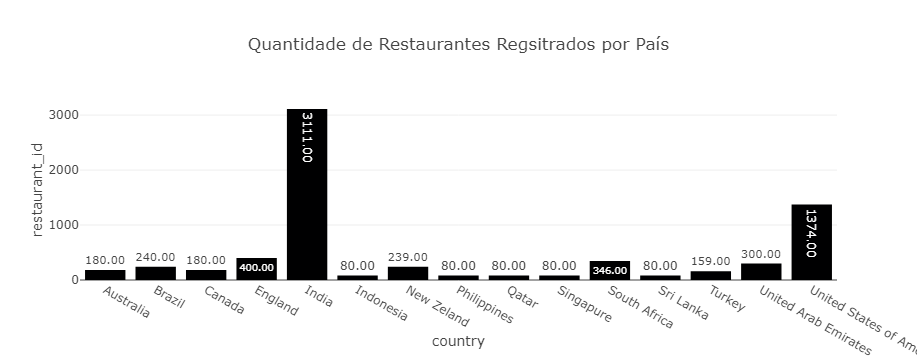

In [4]:
df_aux = df.loc[:, ['restaurant_id', 'country']].groupby('country').count().reset_index()

px.bar(df_aux, x='country', y='restaurant_id', text_auto='.2f', title='Quantidade de Restaurantes Regsitrados por País')

## Quantidade de cidades registrada por País

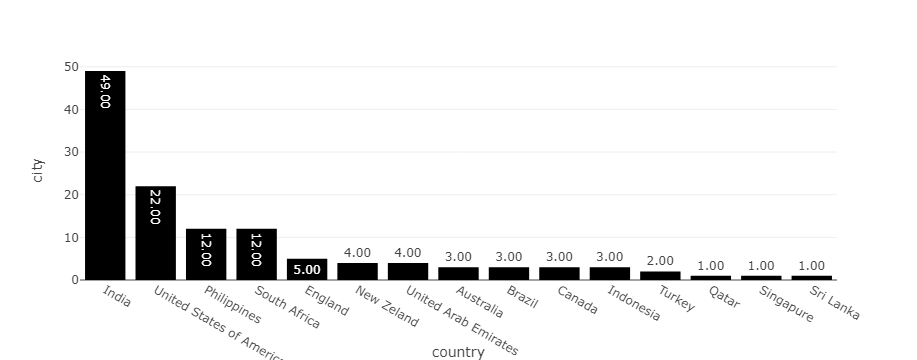

In [56]:
df_aux = df.loc[:, ['city', 'country']].groupby('country').nunique().sort_values('city', ascending=False).reset_index()

px.bar(df_aux, x='country', y='city', text_auto='.2f')

## Média de avaliação feita por país

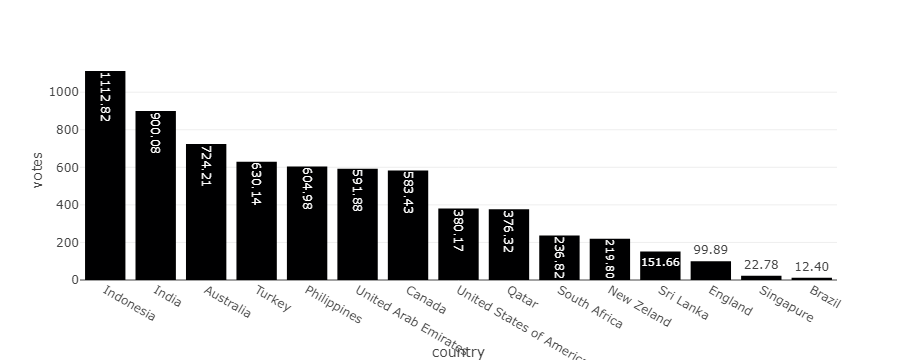

In [55]:
df_aux = df.loc[:, ['votes', 'country']].groupby('country').mean().sort_values('votes',ascending=False).round(2).reset_index()

px.bar(df_aux, x='country', y='votes', text_auto='.2f')

## Média de preço de um prato para duas pessoas por país

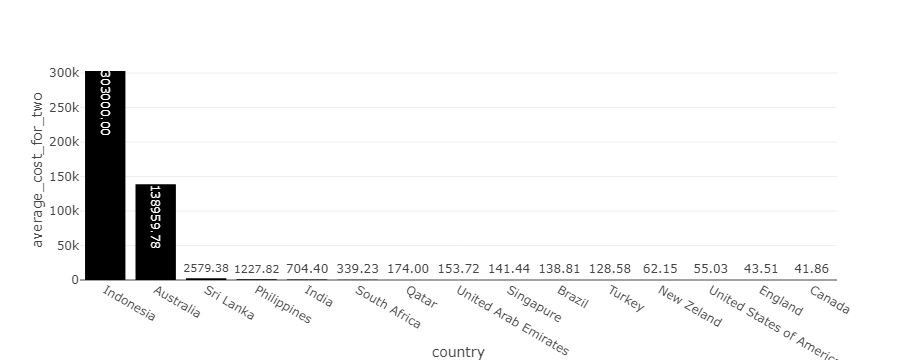

In [86]:
df_aux = (df.loc[:, ['average_cost_for_two', 'country']].groupby('country')
                                               .mean()
                                               .round(2)
                                               .sort_values('average_cost_for_two',ascending=False)
                                               .reset_index())

px.bar(df_aux, x='country', y='average_cost_for_two',text_auto='.2f')

# Gráficos - Cidades

## Top 10 cidade com mais restaurantes na base de dados

In [ ]:
df_aux = (df.loc[: ,['city','country' ,'restaurant_id']].groupby(['country','city'])
                                               .count()
                                               .sort_values(['restaurant_id', 'city'],ascending=[False,True])
                                               .reset_index().head(10))

px.bar(df_aux, x='city', y='restaurant_id', text_auto='restaurant_id', color='country',
       labels={'city': 'Cidade',
               'restaurant_id': 'Qtd Restaurante',
               'country': 'País'})

## Top 7 cidades com resturante com média de avaliação acima 4

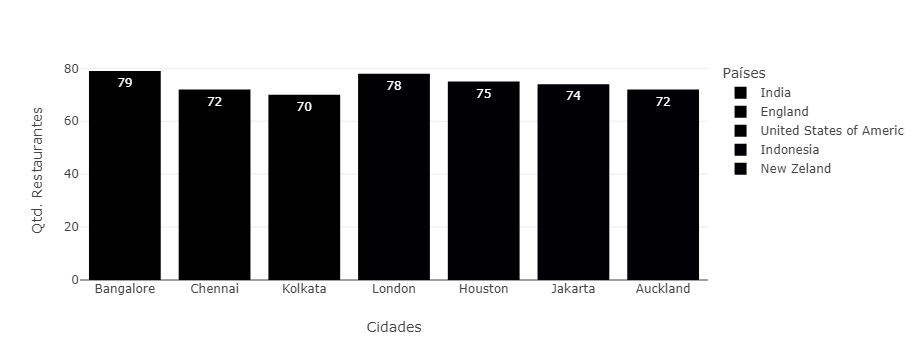

In [5]:
lines = df['aggregate_rating'] > 4
df_aux = (df.loc[lines, ['country', 'city','restaurant_id']].groupby(['country', 'city'])
                                                      .count()
                                                      .sort_values(['restaurant_id', 'city'], ascending=[False, True])
                                                      .reset_index()).head(7)

px.bar(df_aux.head(7), x='city', y='restaurant_id', text_auto='restaurant_id', color='country',
               labels={'city': 'Cidades',
                       'restaurant_id': 'Qtd. Restaurantes',
                       'country': 'Países'})

## Top 7 cidade com restaurantes com média de avaliação abaixo de 2.5

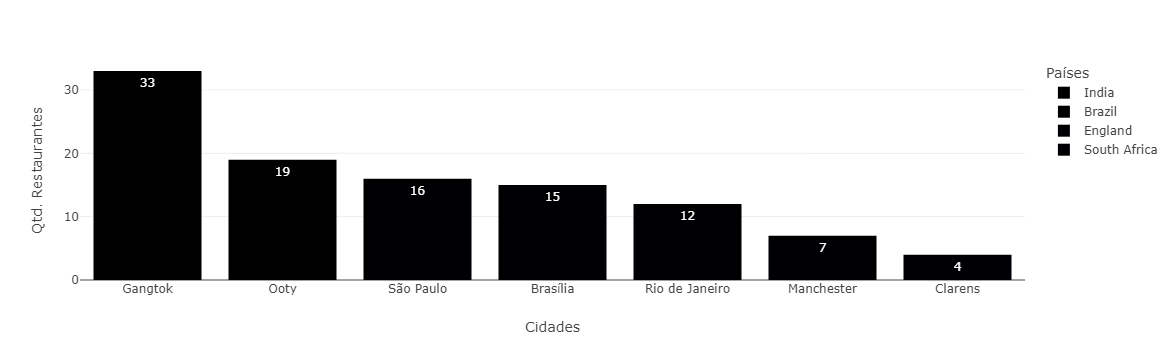

In [71]:
lines = df['aggregate_rating'] < 2.5 
df_aux = (df.loc[lines, ['country', 'city','restaurant_id']].groupby(['country', 'city'])
                                                      .count()
                                                      .sort_values(['restaurant_id', 'city'], ascending=[False, True])
                                                      .reset_index()).head(7)

px.bar(df_aux, x='city', y='restaurant_id', text_auto='restaurant_id', color='country',
               labels={'city': 'Cidades',
                       'restaurant_id': 'Qtd. Restaurantes',
                       'country': 'Países'})

## Top 10 das cidades que tem restaurantes com culinária distinta

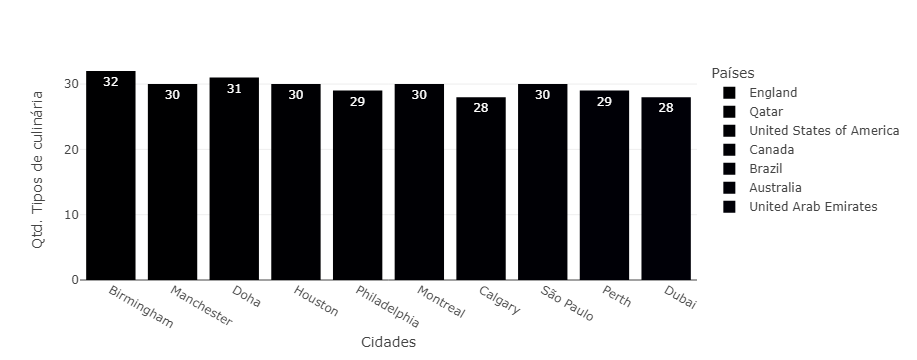

In [82]:
df_aux = (df.loc[:, ['cuisines','country', 'city' ]].groupby(['country','city'])
                                                    .nunique()
                                                    .sort_values(['cuisines','city'], ascending=([False,True]))
                                                    .reset_index()).head(10)
px.bar(df_aux, x='city', y='cuisines', text_auto='cuisines', color='country',
               labels={'city': 'Cidades',
                       'cuisines': 'Qtd. Tipos de culinária',
                       'country': 'Países'})

# Métricas da página Cuisines

In [3]:
cuisines = {"Italian": "", "American": "", "Arabian": "", "Japanese": "", "Brazilian": ""}
cols = ["restaurant_id", "restaurant_name", "country", "city", "cuisines", "average_cost_for_two", "currency",
    "aggregate_rating",
    "votes"]
for key in cuisines.keys():
    lines = df["cuisines"] == key    
    cuisines[key] = (
        df.loc[lines, cols]
        .sort_values(["aggregate_rating", "restaurant_id"], ascending=[False, True])
        .iloc[0, :]
        .to_dict() )
cuisines

{'Italian': {'restaurant_id': 10021,
  'restaurant_name': 'Darshan',
  'country': 'India',
  'city': 'Pune',
  'cuisines': 'Italian',
  'average_cost_for_two': 700,
  'currency': 'Indian Rupees(Rs.)',
  'aggregate_rating': 4.9,
  'votes': 3106},
 'American': {'restaurant_id': 6102616,
  'restaurant_name': 'Burger & Lobster',
  'country': 'England',
  'city': 'London',
  'cuisines': 'American',
  'average_cost_for_two': 45,
  'currency': 'Pounds(£)',
  'aggregate_rating': 4.9,
  'votes': 453},
 'Arabian': {'restaurant_id': 18535007,
  'restaurant_name': 'Mandi@36',
  'country': 'India',
  'city': 'Hyderabad',
  'cuisines': 'Arabian',
  'average_cost_for_two': 600,
  'currency': 'Indian Rupees(Rs.)',
  'aggregate_rating': 4.7,
  'votes': 1085},
 'Japanese': {'restaurant_id': 6107336,
  'restaurant_name': 'Sushi Samba',
  'country': 'England',
  'city': 'London',
  'cuisines': 'Japanese',
  'average_cost_for_two': 110,
  'currency': 'Pounds(£)',
  'aggregate_rating': 4.9,
  'votes': 484},

In [6]:
df.loc[:, ['aggregate_rating', 'cuisines']].groupby('cuisines').mean().sort_values('aggregate_rating', ascending=False).head(10).reset_index()

,cuisines,aggregate_rating
0,Others,4.90
1,Ramen,4.80
2,Ottoman,4.80
3,Egyptian,4.80
4,Fresh Fish,4.75
5,Sunda,4.75
6,Polish,4.70
7,Author,4.70
8,Burmese,4.65
9,Pan Asian,4.60
